# Preparation

## Utilities

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import classification_report

In [ ]:
df_svd = pd.read_excel('/content/for_Truth_table_Consolidated_random__tiles_haralick_svd_pca_classes_2020-08-17.xlsx',
                       sheet_name=0)  
df_pca = pd.read_excel('/content/for_Truth_table_Consolidated_random__tiles_haralick_svd_pca_classes_2020-08-17.xlsx',
                       sheet_name=1)  

In [ ]:
df_svd

,Image,Name,TileNo,Centroid X µm,Centroid Y µm,SVD_Class,SVD_EuD,Tile_Weighted_strength,Tile_Weighted_density,Tile_label_strength,Tile_label_pattern,SVD_class_strength,SVD_class_density,SVD_class_label_strength,SVD_class_label_pattern
0,ABCD3 - Mky508 - SVZi - cntr.svs,Tile 466,466,13913.3,1352.2,0,0.045903,1.857143,1.428571,moderate,sparse,1,1,low,sparse
1,ABCD3 - Mky508 - SVZi - cntr.svs,Tile 2406,2406,14414.5,2956.1,0,0.369687,3.000000,1.000000,high,sparse,1,1,low,sparse
2,ABCD3 - Mky508 - SVZi - cntr.svs,Tile 2566,2566,16419.3,3056.3,0,0.056059,1.000000,1.000000,low,sparse,1,1,low,sparse
3,ABCD3 - Mky508 - SVZi - cntr.svs,Tile 4048,4048,16118.6,4058.7,0,0.045911,1.428571,1.857143,low,dense,1,1,low,sparse
4,ABCD3 - Mky508 - SVZi - cntr.svs,Tile 4634,4634,10304.7,4459.7,4,0.021568,0.428571,0.857143,none,none,2,1,moderate,sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,WLS--Mky508-SVZi--cntr.svs,Tile 15801,15801,4375.0,12890.4,4,0.069586,0.428571,0.857143,none,sparse,2,1,moderate,sparse
94,WLS--Mky508-SVZi--cntr.svs,Tile 16180,16180,3573.1,13191.1,4,0.384526,0.857143,0.857143,low,sparse,2,1,moderate,sparse
95,WLS--Mky508-SVZi--cntr.svs,Tile 16435,16435,3573.1,13391.6,4,0.286357,2.428571,1.000000,moderate,sparse,2,1,moderate,sparse
96,WLS--Mky508-SVZi--cntr.svs,Tile 17763,17763,13095.9,14394.0,2,0.036567,1.142857,2.000000,low,dense,2,2,moderate,dense


## Method definitions

### get confusion matrix

In [ ]:
def get_cm(true_vector, predicted_vector):
  '''returns Confusion matrix whose i-th row and j-th column 
  entry indicates the number of samples with true label 
  being i-th class and prediced label being j-th class.'''
  
  cm = confusion_matrix(true_vector,
                        predicted_vector)
  
  return cm

### get True Positive, True Negative, False Positive and False Negative

In [ ]:
def get_printed_result(FP_v, FN_v, TP_v, TN_v, TPR_val, TNR_val, PPV_val, NPV_val, FPR_val, FNR_val, FDR_val, ACC_val):
  '''just for printing'''

  print(f'\
  All values appear in alphabetical order of class name:\n\
  ---\n\
  False positives vector: {FP_v}, False positive rate (Fall out): {FPR_val}\n\n\
  False negatives vector: {FN_v}, False negative rate: {FNR_val}\n\n\
  True positives vector: {TP_v}, True positive rate (Sensitivity, hit rate, recall): {TPR_val}\n\n\
  True negatives vector: {TN_v}, True negative rate (Specificity): {TNR_val}\n\n\n\
  Precision or positive predictive value: {PPV_val}\n\n\
  Negative predictive value: {NPV_val}\n\n\
  False discovery rate: {FDR_val}\n\n\
  Overall Accuracy: {ACC_val}\n\n\
  ')

In [ ]:
def get_tp_tn_fp_fn(confusion_matrix):
  '''Calculate the analysis values.'''

  FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
  FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
  TP = np.diag(confusion_matrix) #
  TN = confusion_matrix.sum() - (FP + FN + TP)
  ACC = (TP+TN)/(TP+FP+FN+TN)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)

  get_printed_result(FP, FN, TP, TN, TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC)

### draw heatmap

In [ ]:
def draw(class_names, confusion_matrix):
  '''draws heatmap'''
  
  df_cm = DataFrame(confusion_matrix,
                    index=class_names,
                    columns=class_names)
  ax = sn.heatmap(df_cm,
                  cmap='Blues',
                  annot=True)
  
  return ax

### get full classification method

In [ ]:
def get_full_report(class_labels, true_vector, pred_vector):

  print('\nClassification Report\n')
  print(classification_report(true_vector,
                              pred_vector,
                              labels=class_labels))

  print('\nAccuracy: {:.2f}\n'.format(accuracy_score(true_vector,
                                                     pred_vector)))

  print('Micro Precision: {:.2f}'.format(precision_score(true_vector,
                                                         pred_vector,
                                                         average='micro')))
  print('Micro Recall: {:.2f}'.format(recall_score(true_vector,
                                                   pred_vector, 
                                                   average='micro')))
  print('Micro F1-score: {:.2f}\n'.format(f1_score(true_vector, 
                                                   pred_vector,
                                                   average='micro')))

  print('Macro Precision: {:.2f}'.format(precision_score(true_vector, 
                                                         pred_vector,
                                                         average='macro')))
  print('Macro Recall: {:.2f}'.format(recall_score(true_vector,
                                                   pred_vector,
                                                   average='macro')))
  print('Macro F1-score: {:.2f}\n'.format(f1_score(true_vector,
                                                   pred_vector,
                                                   average='macro')))

  print('Weighted Precision: {:.2f}'.format(precision_score(true_vector,
                                                            pred_vector,
                                                            average='weighted')))
  print('Weighted Recall: {:.2f}'.format(recall_score(true_vector,
                                                      pred_vector, 
                                                      average='weighted')))
  print('Weighted F1-score: {:.2f}\n'.format(f1_score(true_vector,
                                                      pred_vector,
                                                      average='weighted')))

  print('Cohen\'s kappa: {:.2f}'. format(cohen_kappa_score(true_vector, 
                                                           pred_vector)))

# SVD_consolidated_random_augm

## Tile_label_strength **vs.** SVD_class_label_strength

In [ ]:
cm1 = get_cm(df_svd['Tile_label_strength'],
       df_svd['SVD_class_label_strength'])
cm1

array([[14,  4,  7,  1],
       [ 2,  3, 14,  5],
       [10,  6, 16,  3],
       [ 2,  1,  5,  5]])

In [ ]:
get_tp_tn_fp_fn(cm1)

  All values appear in alphabetical order of class name:
  ---
  False positives vector: [14 11 26  9], False positive rate (Fall out): [0.19444444 0.14864865 0.41269841 0.10588235]

  False negatives vector: [12 21 19  8], False negative rate: [0.46153846 0.875      0.54285714 0.61538462]

  True positives vector: [14  3 16  5], True positive rate (Sensitivity, hit rate, recall): [0.53846154 0.125      0.45714286 0.38461538]

  True negatives vector: [58 63 37 76], True negative rate (Specificity): [0.80555556 0.85135135 0.58730159 0.89411765]


  Precision or positive predictive value: [0.5        0.21428571 0.38095238 0.35714286]

  Negative predictive value: [0.82857143 0.75       0.66071429 0.9047619 ]

  False discovery rate: [0.5        0.78571429 0.61904762 0.64285714]

  Overall Accuracy: [0.73469388 0.67346939 0.54081633 0.82653061]

  


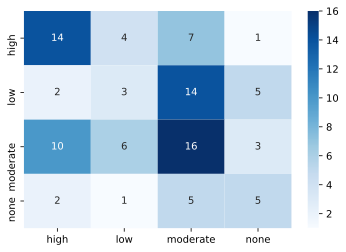

In [ ]:
draw(['high', 'low', 'moderate', 'none'], cm1)

In [ ]:
get_full_report(['high', 'low','moderate','none'],
                df_svd['Tile_label_strength'],
                df_svd['SVD_class_label_strength'])


Classification Report

              precision    recall  f1-score   support

        high       0.50      0.54      0.52        26
         low       0.21      0.12      0.16        24
    moderate       0.38      0.46      0.42        35
        none       0.36      0.38      0.37        13

    accuracy                           0.39        98
   macro avg       0.36      0.38      0.37        98
weighted avg       0.37      0.39      0.37        98


Accuracy: 0.39

Micro Precision: 0.39
Micro Recall: 0.39
Micro F1-score: 0.39

Macro Precision: 0.36
Macro Recall: 0.38
Macro F1-score: 0.37

Weighted Precision: 0.37
Weighted Recall: 0.39
Weighted F1-score: 0.37

Cohen's kappa: 0.15


## Tile_label_pattern **vs.** SVD_class_label_pattern

In [ ]:
cm2 = get_cm(df_svd['Tile_label_pattern'],
       df_svd['SVD_class_label_pattern'])
cm2

array([[22,  2,  7],
       [ 3,  5,  5],
       [17,  7, 30]])

In [ ]:
get_tp_tn_fp_fn(cm2)

  All values appear in alphabetical order of class name:
  ---
  False positives vector: [20  9 12], False positive rate (Fall out): [0.29850746 0.10588235 0.27272727]

  False negatives vector: [ 9  8 24], False negative rate: [0.29032258 0.61538462 0.44444444]

  True positives vector: [22  5 30], True positive rate (Sensitivity, hit rate, recall): [0.70967742 0.38461538 0.55555556]

  True negatives vector: [47 76 32], True negative rate (Specificity): [0.70149254 0.89411765 0.72727273]


  Precision or positive predictive value: [0.52380952 0.35714286 0.71428571]

  Negative predictive value: [0.83928571 0.9047619  0.57142857]

  False discovery rate: [0.47619048 0.64285714 0.28571429]

  Overall Accuracy: [0.70408163 0.82653061 0.63265306]

  


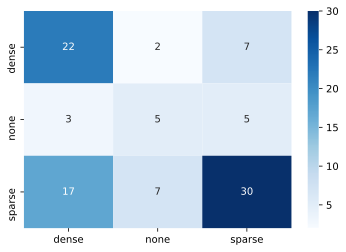

In [ ]:
draw(['dense', 'none','sparse'], cm2)

In [ ]:
get_full_report(['dense', 'none','sparse'],
                df_svd['Tile_label_pattern'],
                df_svd['SVD_class_label_pattern'])


Classification Report

              precision    recall  f1-score   support

       dense       0.52      0.71      0.60        31
        none       0.36      0.38      0.37        13
      sparse       0.71      0.56      0.63        54

    accuracy                           0.58        98
   macro avg       0.53      0.55      0.53        98
weighted avg       0.61      0.58      0.58        98


Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.53
Macro Recall: 0.55
Macro F1-score: 0.53

Weighted Precision: 0.61
Weighted Recall: 0.58
Weighted F1-score: 0.58

Cohen's kappa: 0.31


# PCA_consolidated_random_augm

## Tile_label_strength **vs.** PCA_class_label_strength

In [ ]:
cm3 = get_cm(df_pca['Tile_label_strength'],
             df_pca['PCA_class_label_strength'])
cm3

array([[18,  2,  4,  0],
       [ 2, 14,  8,  1],
       [ 7,  9, 11,  0],
       [ 1,  3,  5, 13]])

In [ ]:
get_tp_tn_fp_fn(cm3)

  All values appear in alphabetical order of class name:
  ---
  False positives vector: [10 14 17  1], False positive rate (Fall out): [0.13513514 0.19178082 0.23943662 0.01315789]

  False negatives vector: [ 6 11 16  9], False negative rate: [0.25       0.44       0.59259259 0.40909091]

  True positives vector: [18 14 11 13], True positive rate (Sensitivity, hit rate, recall): [0.75       0.56       0.40740741 0.59090909]

  True negatives vector: [64 59 54 75], True negative rate (Specificity): [0.86486486 0.80821918 0.76056338 0.98684211]


  Precision or positive predictive value: [0.64285714 0.5        0.39285714 0.92857143]

  Negative predictive value: [0.91428571 0.84285714 0.77142857 0.89285714]

  False discovery rate: [0.35714286 0.5        0.60714286 0.07142857]

  Overall Accuracy: [0.83673469 0.74489796 0.66326531 0.89795918]

  


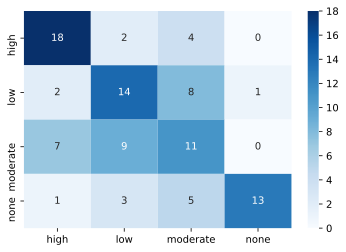

In [ ]:
draw(['high', 'low','moderate','none'], cm3)

In [ ]:
get_full_report(['high', 'low','moderate','none'],
                df_pca['Tile_label_strength'],
                df_pca['PCA_class_label_strength'])


Classification Report

              precision    recall  f1-score   support

        high       0.64      0.75      0.69        24
         low       0.50      0.56      0.53        25
    moderate       0.39      0.41      0.40        27
        none       0.93      0.59      0.72        22

    accuracy                           0.57        98
   macro avg       0.62      0.58      0.59        98
weighted avg       0.60      0.57      0.58        98


Accuracy: 0.57

Micro Precision: 0.57
Micro Recall: 0.57
Micro F1-score: 0.57

Macro Precision: 0.62
Macro Recall: 0.58
Macro F1-score: 0.59

Weighted Precision: 0.60
Weighted Recall: 0.57
Weighted F1-score: 0.58

Cohen's kappa: 0.43


 ## Tile_label_pattern **vs.** PCA_class_label_pattern

In [ ]:
cm4 = get_cm(df_pca['Tile_label_pattern'],
             df_pca['PCA_class_label_pattern'])
cm4

array([[15,  0, 14],
       [ 3, 14,  6],
       [24,  0, 22]])

In [ ]:
get_tp_tn_fp_fn(cm4)

  All values appear in alphabetical order of class name:
  ---
  False positives vector: [27  0 20], False positive rate (Fall out): [0.39130435 0.         0.38461538]

  False negatives vector: [14  9 24], False negative rate: [0.48275862 0.39130435 0.52173913]

  True positives vector: [15 14 22], True positive rate (Sensitivity, hit rate, recall): [0.51724138 0.60869565 0.47826087]

  True negatives vector: [42 75 32], True negative rate (Specificity): [0.60869565 1.         0.61538462]


  Precision or positive predictive value: [0.35714286 1.         0.52380952]

  Negative predictive value: [0.75       0.89285714 0.57142857]

  False discovery rate: [0.64285714 0.         0.47619048]

  Overall Accuracy: [0.58163265 0.90816327 0.55102041]

  


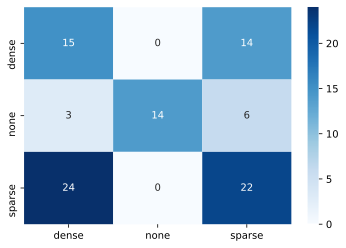

In [ ]:
draw(['dense', 'none','sparse'], cm4)

In [ ]:
get_full_report(['dense', 'none','sparse'],
                df_pca['Tile_label_pattern'],
                df_pca['PCA_class_label_pattern'])


Classification Report

              precision    recall  f1-score   support

       dense       0.36      0.52      0.42        29
        none       1.00      0.61      0.76        23
      sparse       0.52      0.48      0.50        46

    accuracy                           0.52        98
   macro avg       0.63      0.53      0.56        98
weighted avg       0.59      0.52      0.54        98


Accuracy: 0.52

Micro Precision: 0.52
Micro Recall: 0.52
Micro F1-score: 0.52

Macro Precision: 0.63
Macro Recall: 0.53
Macro F1-score: 0.56

Weighted Precision: 0.59
Weighted Recall: 0.52
Weighted F1-score: 0.54

Cohen's kappa: 0.25
